In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
from IPython.display import Math
sns.set(rc={'figure.figsize':[12,8]})

df = pd.read_pickle('DB_SP.pkl')

df = df.astype({'sp_bcg_timing':'category'})
df['sp_bcg_timing'].cat.reorder_categories(['Pre','Post'], ordered=True, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 04-S-6743 to 99-S-5927
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   pt                      46 non-null     object  
 1   lesion                  51 non-null     object  
 2   turb                    51 non-null     int64   
 3   recurrence_next         45 non-null     object  
 4   recurrence_any          51 non-null     object  
 5   progression_grade_next  47 non-null     object  
 6   progression_grade_any   51 non-null     object  
 7   progression_stage_next  44 non-null     object  
 8   progression_stage_any   51 non-null     object  
 9   sp_bcg_timing           51 non-null     category
 10  sting_tumor             30 non-null     float64 
 11  sting_inflammatory      23 non-null     float64 
 12  cgas_tumor              30 non-null     float64 
 13  cgas_inflammatory       23 non-null     float64 
 14  pirf3_tumor       

In [2]:
# Functions
def compare_expression(marker, group, data=df):
    tbl = data.groupby(group)[marker].describe().round()
    p = scipy.stats.mannwhitneyu(*[dataframe[marker].values for name, dataframe in data.groupby(group)])[1]
    g = sns.boxplot(x=group, y=marker, data=data)
    display(tbl, Math('P = {:.1E}'.format(p)))

# Expression related to treatment timing

In [3]:
# Comparing expression before and after BCG treatment
group = 'sp_bcg_timing'

## STING in tumor cells

,count,mean,std,min,25%,50%,75%,max
sp_bcg_timing,,,,,,,,
Pre,16.0,18.0,30.0,0.0,0.0,2.0,17.0,90.0
Post,14.0,24.0,32.0,0.0,1.0,10.0,30.0,80.0


<IPython.core.display.Math object>

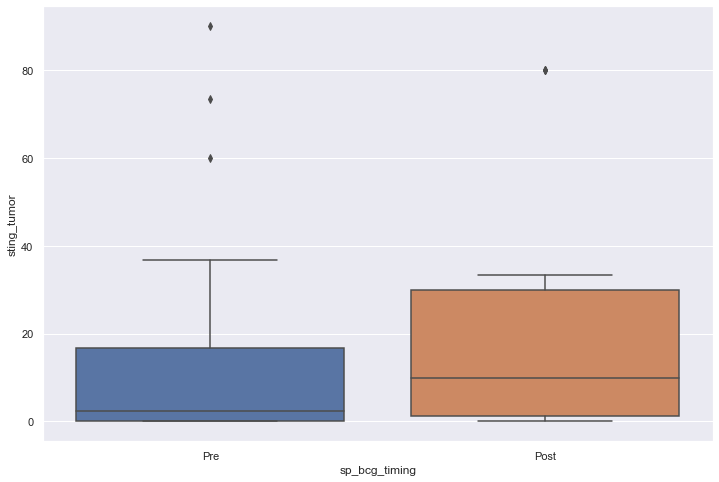

In [4]:
marker = 'sting_tumor'
compare_expression(marker, group)

## STING in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
sp_bcg_timing,,,,,,,,
Pre,12.0,98.0,4.0,90.0,96.0,100.0,100.0,100.0
Post,11.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0


<IPython.core.display.Math object>

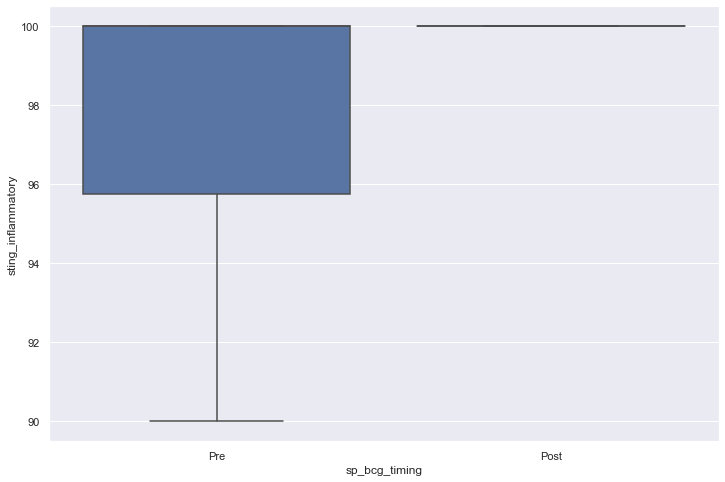

In [5]:
marker = 'sting_inflammatory'
compare_expression(marker, group)

## cGAS in tumor cells

,count,mean,std,min,25%,50%,75%,max
sp_bcg_timing,,,,,,,,
Pre,16.0,76.0,26.0,13.0,66.0,88.0,93.0,100.0
Post,14.0,55.0,38.0,0.0,30.0,65.0,88.0,100.0


<IPython.core.display.Math object>

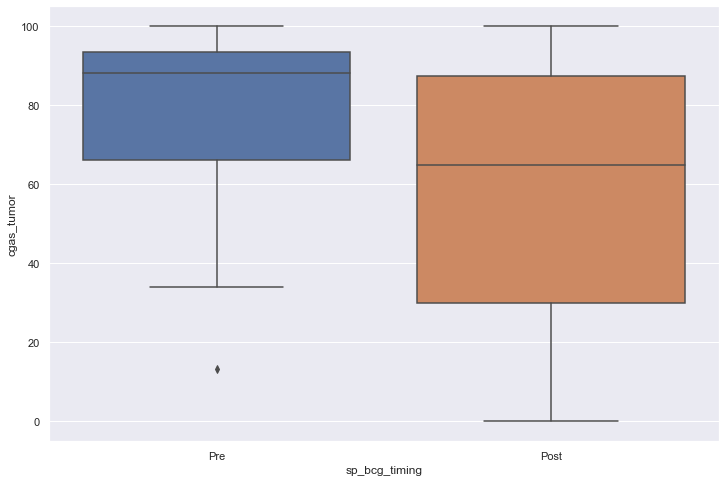

In [6]:
marker = 'cgas_tumor'
compare_expression(marker, group)

## cGAS in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
sp_bcg_timing,,,,,,,,
Pre,12.0,7.0,12.0,0.0,0.0,2.0,10.0,34.0
Post,11.0,14.0,14.0,0.0,4.0,10.0,22.0,40.0


<IPython.core.display.Math object>

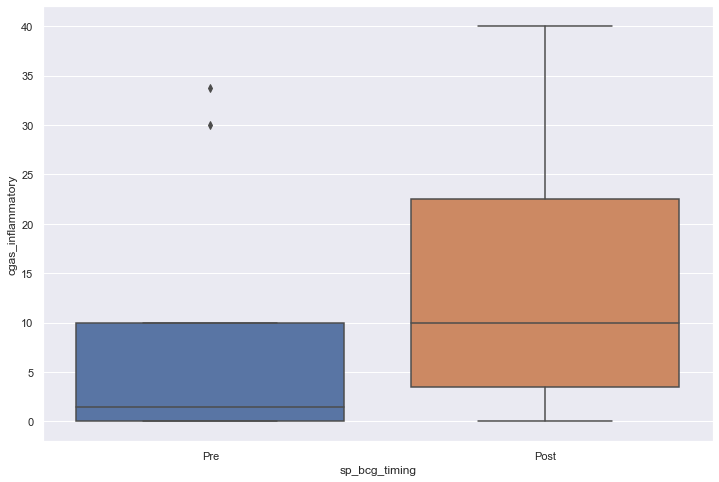

In [7]:
marker = 'cgas_inflammatory'
compare_expression(marker, group)

## pIRF3 in tumor cells

,count,mean,std,min,25%,50%,75%,max
sp_bcg_timing,,,,,,,,
Pre,16.0,23.0,36.0,0.0,0.0,0.0,30.0,100.0
Post,14.0,4.0,11.0,0.0,0.0,0.0,1.0,40.0


<IPython.core.display.Math object>

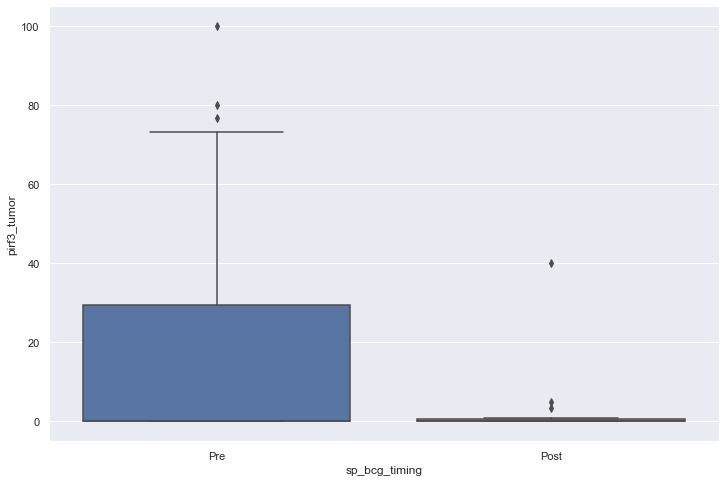

In [8]:
marker = 'pirf3_tumor'
compare_expression(marker, group)

## pIRF3 in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
sp_bcg_timing,,,,,,,,
Pre,12.0,3.0,6.0,0.0,0.0,0.0,3.0,16.0
Post,11.0,19.0,29.0,0.0,0.0,0.0,26.0,90.0


<IPython.core.display.Math object>

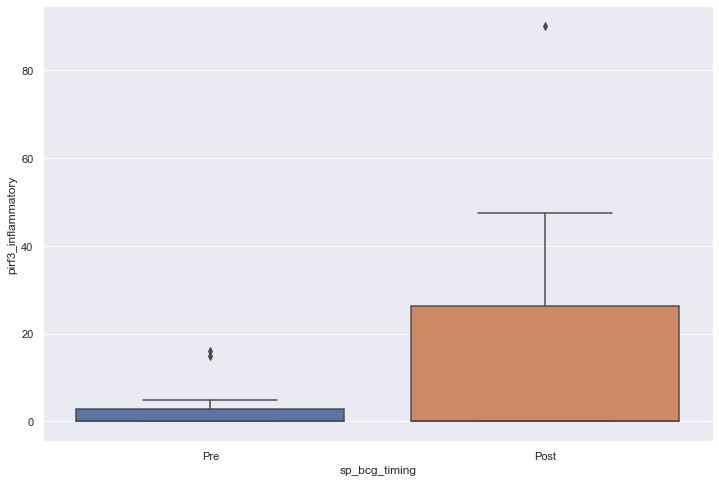

In [9]:
marker = 'pirf3_inflammatory'
compare_expression(marker, group)

# Expression by outcome in pre treated patients

In [10]:
# Selecting biopsies that were taken BEFORE BCG treatment
df_post = df.query('sp_bcg_timing == "Pre"')
df_post.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 04-S-6743 to 99-S-5927
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   pt                      20 non-null     object  
 1   lesion                  22 non-null     object  
 2   turb                    22 non-null     int64   
 3   recurrence_next         22 non-null     object  
 4   recurrence_any          22 non-null     object  
 5   progression_grade_next  22 non-null     object  
 6   progression_grade_any   22 non-null     object  
 7   progression_stage_next  22 non-null     object  
 8   progression_stage_any   22 non-null     object  
 9   sp_bcg_timing           22 non-null     category
 10  sting_tumor             16 non-null     float64 
 11  sting_inflammatory      12 non-null     float64 
 12  cgas_tumor              16 non-null     float64 
 13  cgas_inflammatory       12 non-null     float64 
 14  pirf3_tumor       

## Recurrence at next biopsy

In [11]:
group = 'recurrence_next'

### STING in tumor cells

,count,mean,std,min,25%,50%,75%,max
recurrence_next,,,,,,,,
No,3.0,42.0,45.0,0.0,18.0,37.0,63.0,90.0
Yes,13.0,13.0,24.0,0.0,0.0,2.0,10.0,73.0


<IPython.core.display.Math object>

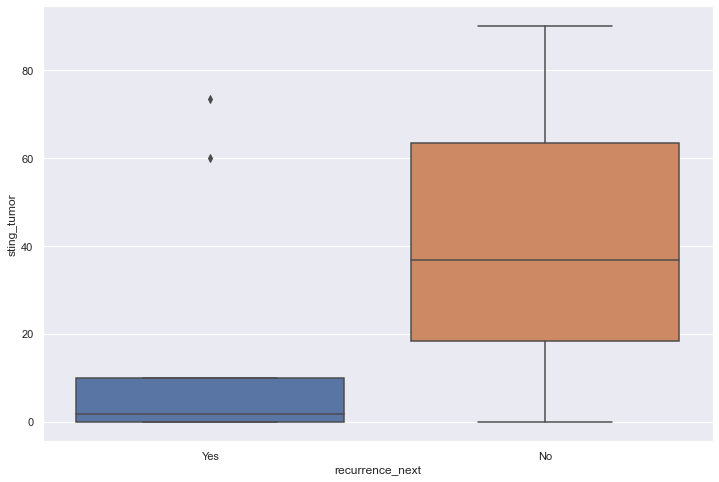

In [12]:
marker = 'sting_tumor'
compare_expression(marker, group, data=df_post)

### STING in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
recurrence_next,,,,,,,,
No,3.0,97.0,6.0,90.0,95.0,100.0,100.0,100.0
Yes,9.0,98.0,4.0,90.0,96.0,100.0,100.0,100.0


<IPython.core.display.Math object>

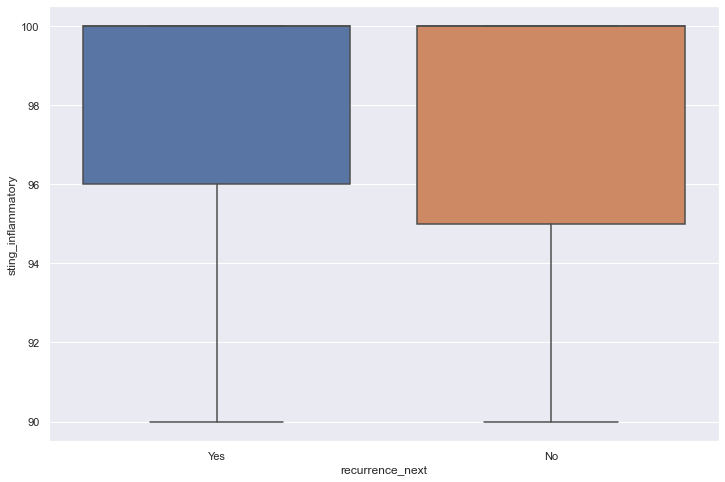

In [13]:
marker = 'sting_inflammatory'
compare_expression(marker, group, data=df_post)

### cGAS in tumor cells

,count,mean,std,min,25%,50%,75%,max
recurrence_next,,,,,,,,
No,3.0,93.0,6.0,88.0,89.0,90.0,95.0,100.0
Yes,13.0,73.0,28.0,13.0,65.0,80.0,93.0,100.0


<IPython.core.display.Math object>

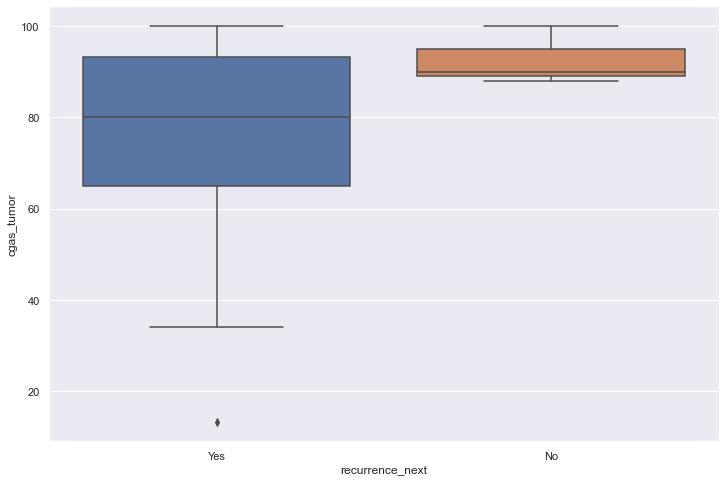

In [14]:
marker = 'cgas_tumor'
compare_expression(marker, group, data=df_post)

### cGAS in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
recurrence_next,,,,,,,,
No,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Yes,9.0,10.0,13.0,0.0,0.0,2.0,10.0,34.0


<IPython.core.display.Math object>

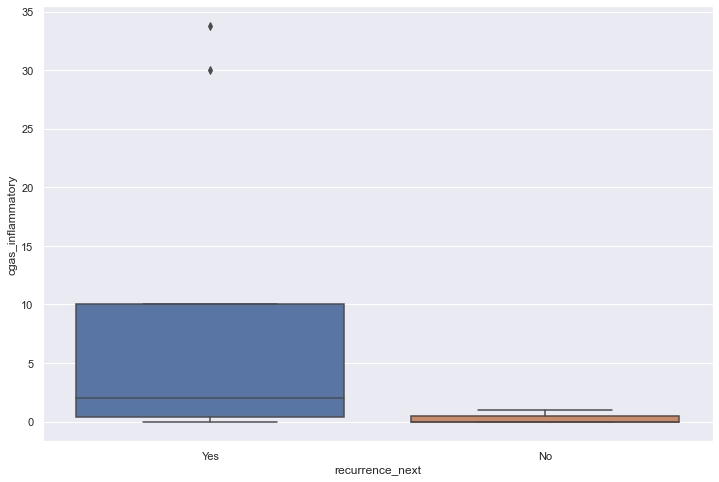

In [15]:
marker = 'cgas_inflammatory'
compare_expression(marker, group, data=df_post)

### pIRF3 in tumor cells

,count,mean,std,min,25%,50%,75%,max
recurrence_next,,,,,,,,
No,3.0,26.0,44.0,0.0,0.0,0.0,38.0,77.0
Yes,13.0,22.0,36.0,0.0,0.0,0.0,15.0,100.0


<IPython.core.display.Math object>

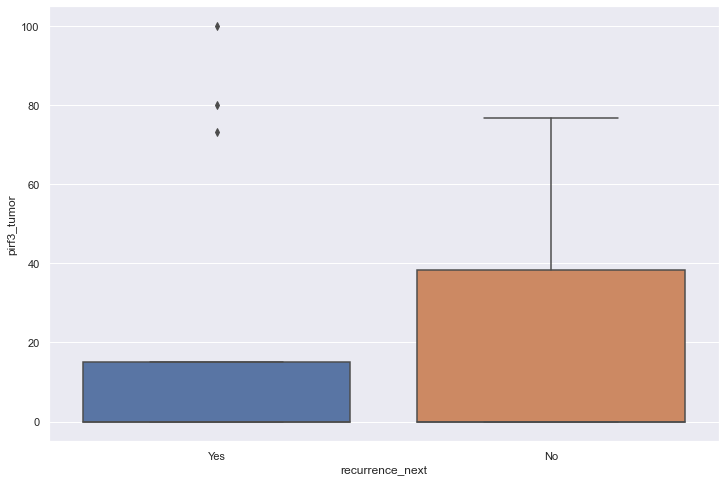

In [16]:
marker = 'pirf3_tumor'
compare_expression(marker, group, data=df_post)

### pIRF3 in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
recurrence_next,,,,,,,,
No,3.0,5.0,8.0,0.0,0.0,1.0,8.0,15.0
Yes,9.0,3.0,5.0,0.0,0.0,0.0,2.0,16.0


<IPython.core.display.Math object>

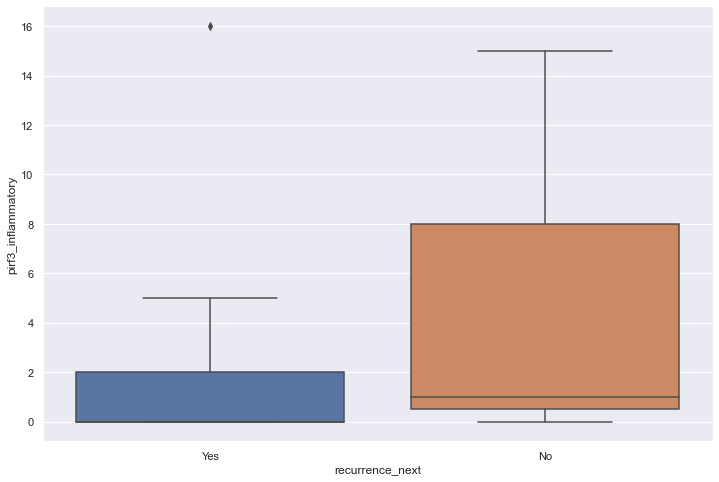

In [17]:
marker = 'pirf3_inflammatory'
compare_expression(marker, group, data=df_post)

## Recurrence at any biopsy

In [18]:
group = 'recurrence_any'

### STING in tumor cells

,count,mean,std,min,25%,50%,75%,max
recurrence_any,,,,,,,,
No,1.0,90.0,NaN,90.0,90.0,90.0,90.0,90.0
Yes,15.0,13.0,24.0,0.0,0.0,2.0,10.0,73.0


<IPython.core.display.Math object>

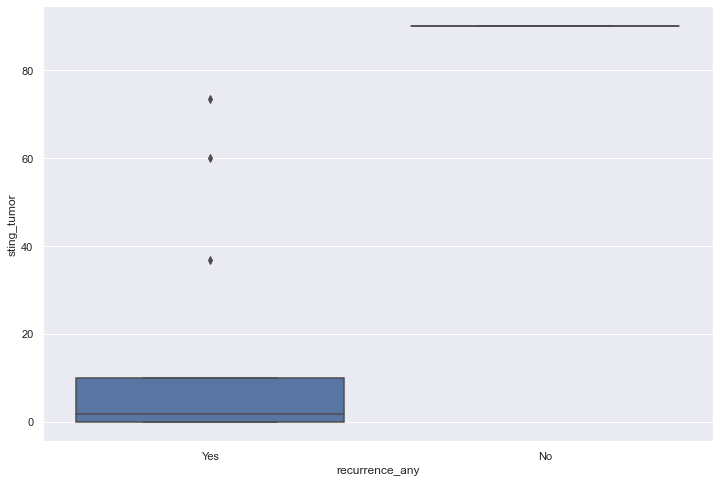

In [19]:
marker = 'sting_tumor'
compare_expression(marker, group, data=df_post)

### STING in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
recurrence_any,,,,,,,,
No,1.0,100.0,NaN,100.0,100.0,100.0,100.0,100.0
Yes,11.0,97.0,4.0,90.0,96.0,100.0,100.0,100.0


<IPython.core.display.Math object>

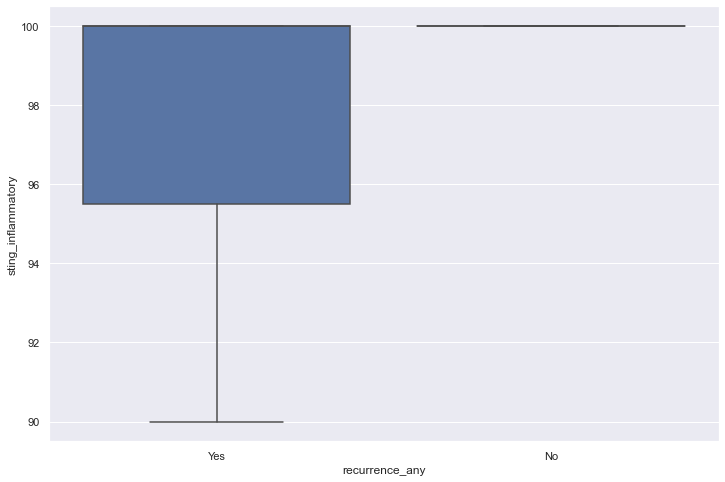

In [20]:
marker = 'sting_inflammatory'
compare_expression(marker, group, data=df_post)

### cGAS in tumor cells

,count,mean,std,min,25%,50%,75%,max
recurrence_any,,,,,,,,
No,1.0,88.0,NaN,88.0,88.0,88.0,88.0,88.0
Yes,15.0,76.0,27.0,13.0,66.0,88.0,93.0,100.0


<IPython.core.display.Math object>

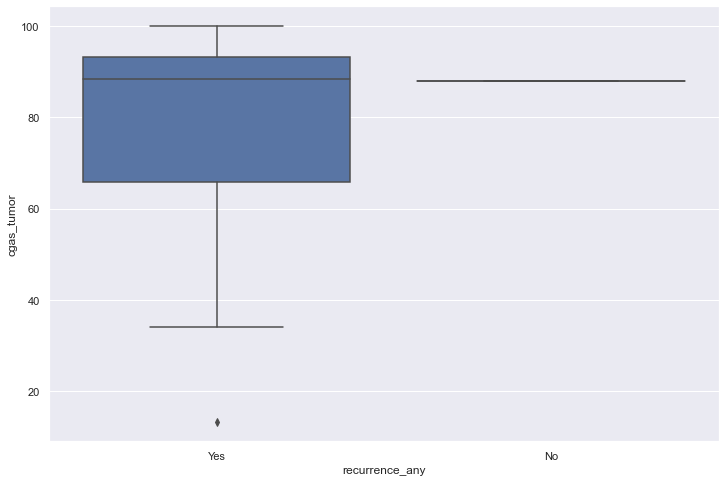

In [21]:
marker = 'cgas_tumor'
compare_expression(marker, group, data=df_post)

### cGAS in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
recurrence_any,,,,,,,,
No,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Yes,11.0,8.0,12.0,0.0,0.0,2.0,10.0,34.0


<IPython.core.display.Math object>

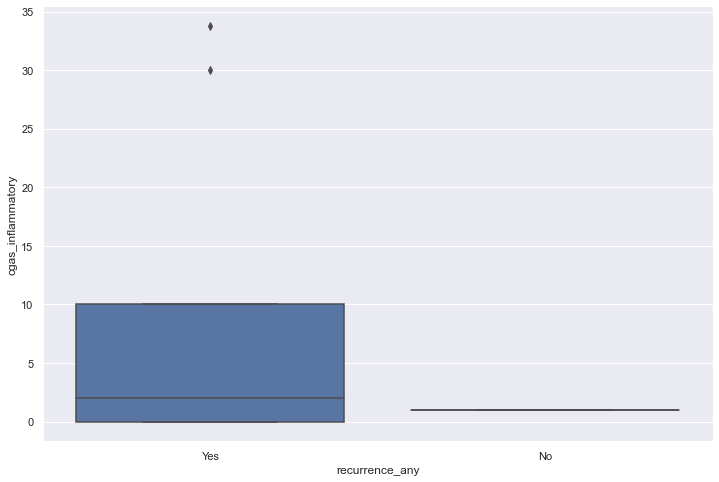

In [22]:
marker = 'cgas_inflammatory'
compare_expression(marker, group, data=df_post)

### pIRF3 in tumor cells

,count,mean,std,min,25%,50%,75%,max
recurrence_any,,,,,,,,
No,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
Yes,15.0,24.0,37.0,0.0,0.0,0.0,44.0,100.0


<IPython.core.display.Math object>

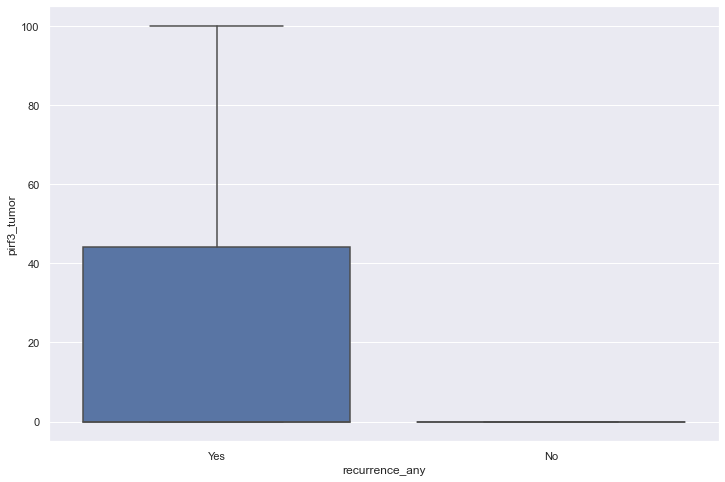

In [23]:
marker = 'pirf3_tumor'
compare_expression(marker, group, data=df_post)

### pIRF3 in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
recurrence_any,,,,,,,,
No,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Yes,11.0,3.0,6.0,0.0,0.0,0.0,4.0,16.0


<IPython.core.display.Math object>

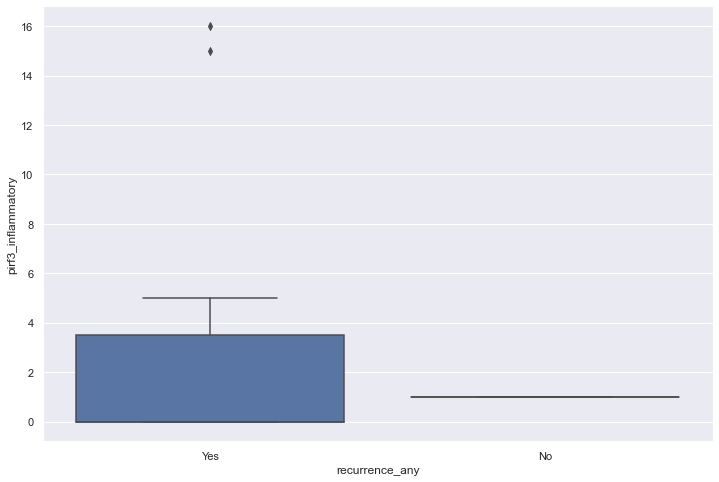

In [24]:
marker = 'pirf3_inflammatory'
compare_expression(marker, group, data=df_post)

## Grade progression at next biopsy

In [25]:
group = 'progression_grade_next'

### STING in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_grade_next,,,,,,,,
No,16.0,18.0,30.0,0.0,0.0,2.0,17.0,90.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

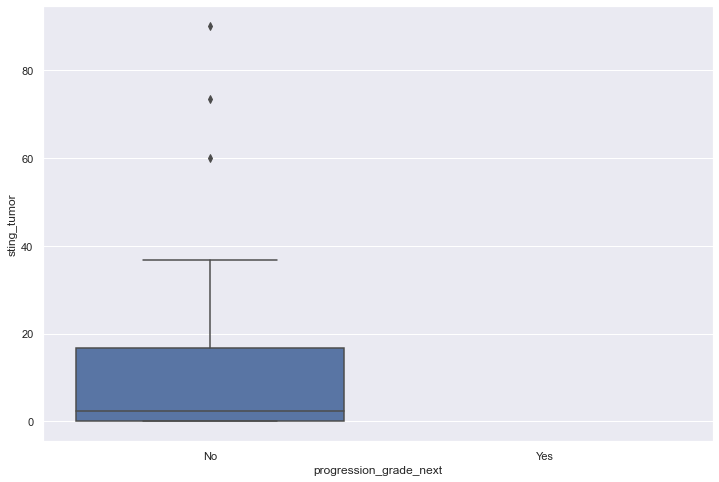

In [26]:
marker = 'sting_tumor'
compare_expression(marker, group, data=df_post)

### STING in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_grade_next,,,,,,,,
No,12.0,98.0,4.0,90.0,96.0,100.0,100.0,100.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

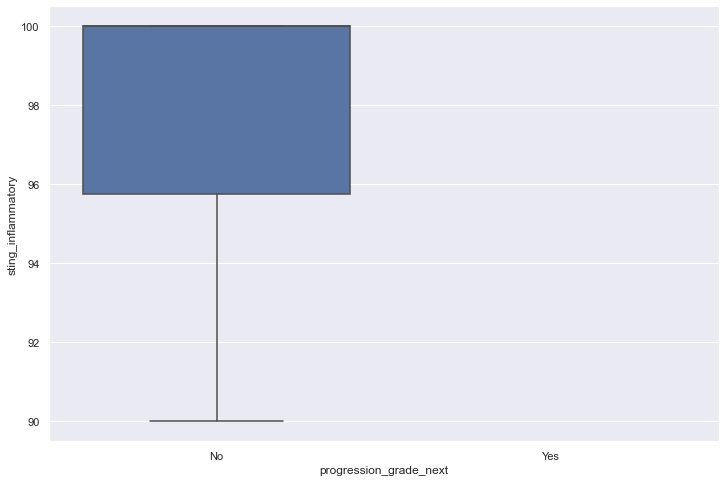

In [27]:
marker = 'sting_inflammatory'
compare_expression(marker, group, data=df_post)

### cGAS in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_grade_next,,,,,,,,
No,16.0,76.0,26.0,13.0,66.0,88.0,93.0,100.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

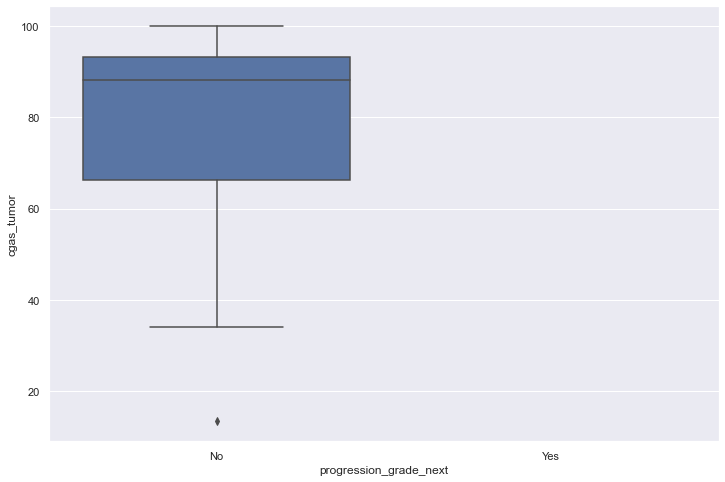

In [28]:
marker = 'cgas_tumor'
compare_expression(marker, group, data=df_post)

### cGAS in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_grade_next,,,,,,,,
No,12.0,7.0,12.0,0.0,0.0,2.0,10.0,34.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

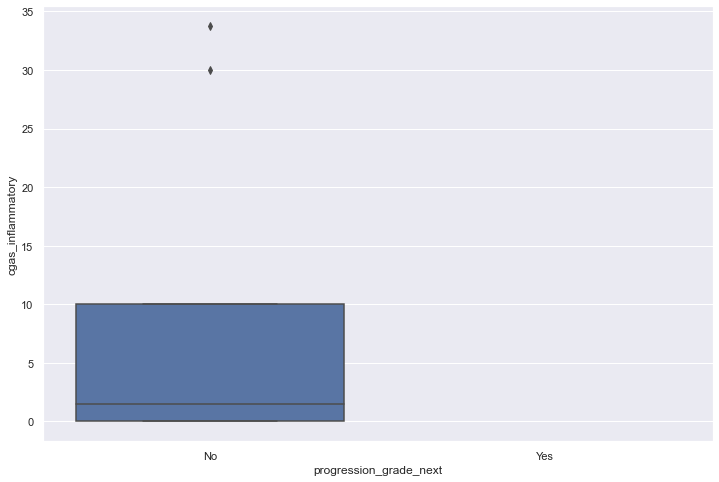

In [29]:
marker = 'cgas_inflammatory'
compare_expression(marker, group, data=df_post)

### pIRF3 in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_grade_next,,,,,,,,
No,16.0,23.0,36.0,0.0,0.0,0.0,30.0,100.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

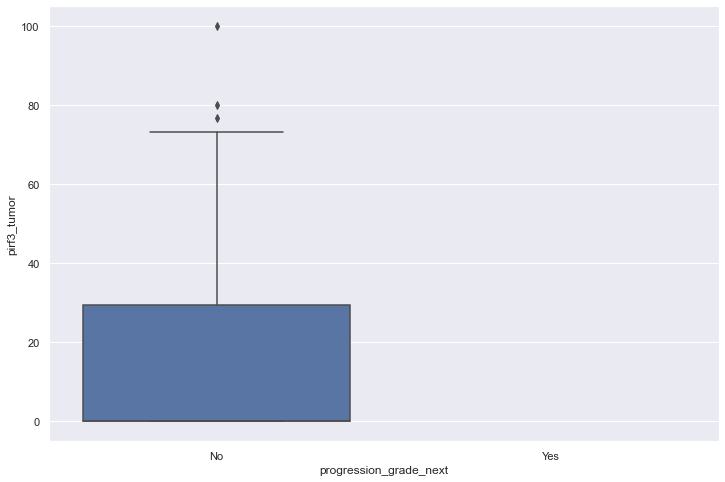

In [30]:
marker = 'pirf3_tumor'
compare_expression(marker, group, data=df_post)

### pIRF3 in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_grade_next,,,,,,,,
No,12.0,3.0,6.0,0.0,0.0,0.0,3.0,16.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

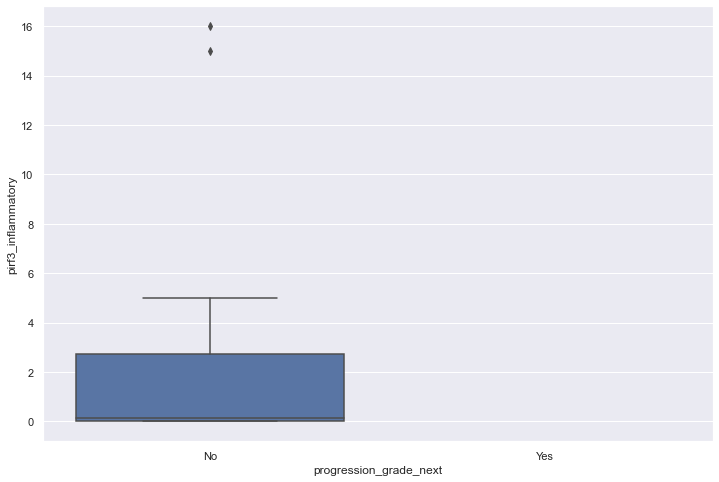

In [31]:
marker = 'pirf3_inflammatory'
compare_expression(marker, group, data=df_post)

## Grade progression at any biopsy

In [32]:
group = 'progression_grade_any'

### STING in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_grade_any,,,,,,,,
No,16.0,18.0,30.0,0.0,0.0,2.0,17.0,90.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

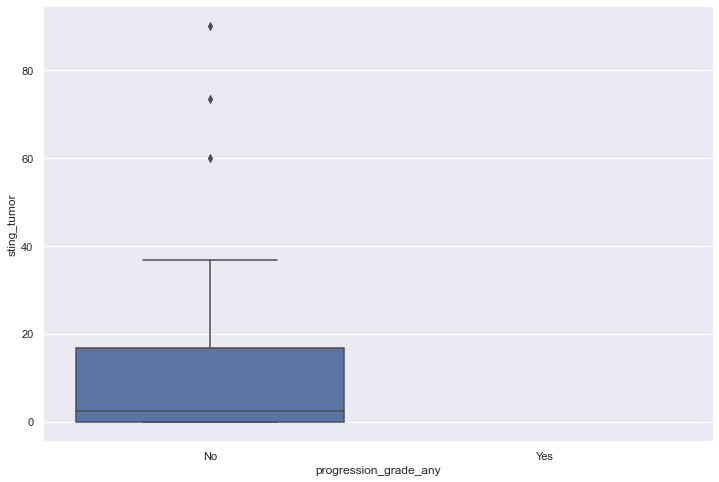

In [33]:
marker = 'sting_tumor'
compare_expression(marker, group, data=df_post)

### STING in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_grade_any,,,,,,,,
No,12.0,98.0,4.0,90.0,96.0,100.0,100.0,100.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

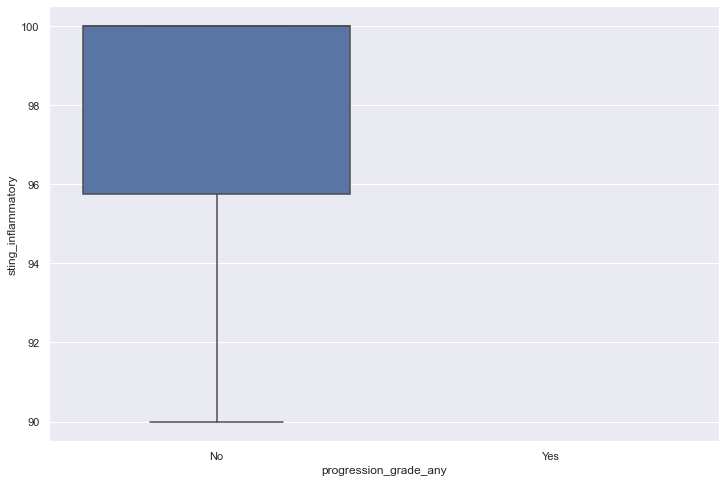

In [34]:
marker = 'sting_inflammatory'
compare_expression(marker, group, data=df_post)

### cGAS in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_grade_any,,,,,,,,
No,16.0,76.0,26.0,13.0,66.0,88.0,93.0,100.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

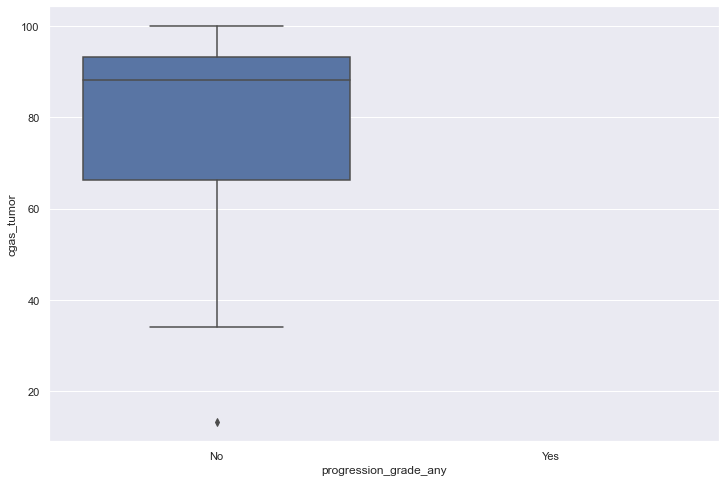

In [35]:
marker = 'cgas_tumor'
compare_expression(marker, group, data=df_post)

### cGAS in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_grade_any,,,,,,,,
No,12.0,7.0,12.0,0.0,0.0,2.0,10.0,34.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

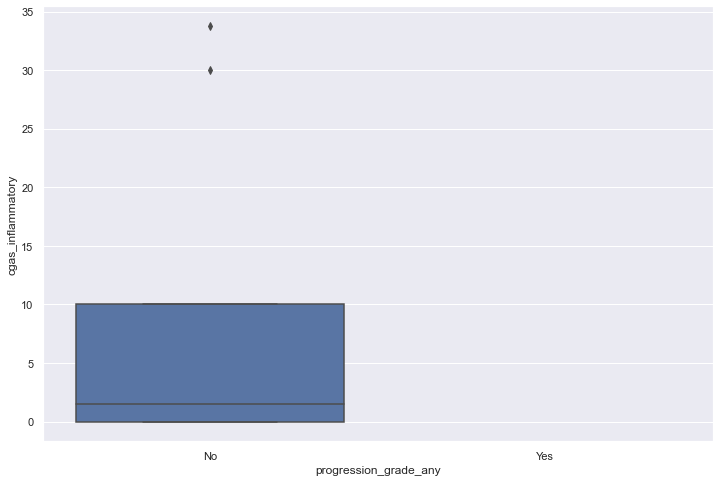

In [36]:
marker = 'cgas_inflammatory'
compare_expression(marker, group, data=df_post)

### pIRF3 in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_grade_any,,,,,,,,
No,16.0,23.0,36.0,0.0,0.0,0.0,30.0,100.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

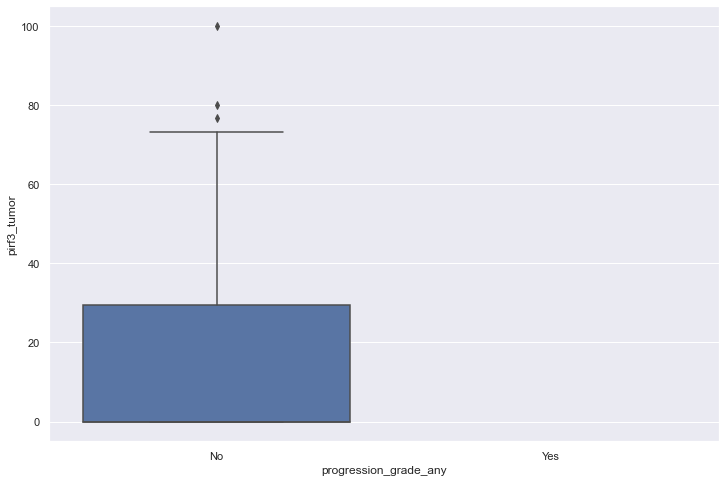

In [37]:
marker = 'pirf3_tumor'
compare_expression(marker, group, data=df_post)

### pIRF3 in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_grade_any,,,,,,,,
No,12.0,3.0,6.0,0.0,0.0,0.0,3.0,16.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

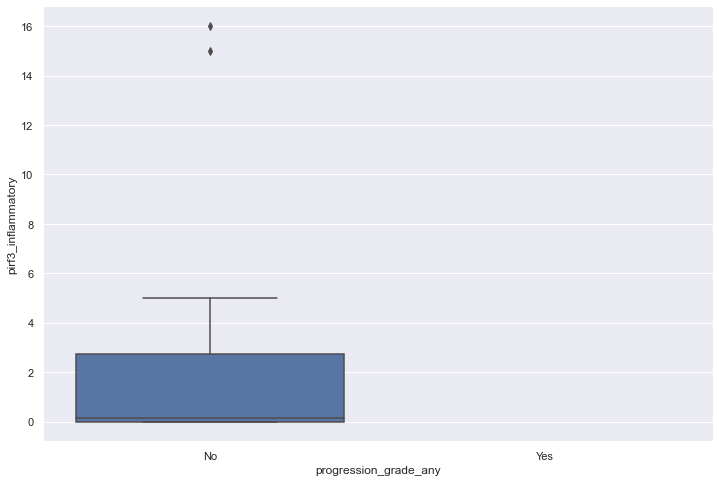

In [38]:
marker = 'pirf3_inflammatory'
compare_expression(marker, group, data=df_post)

## Stage progression at next biopsy

In [39]:
group = 'progression_stage_next'

### STING in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_stage_next,,,,,,,,
No,16.0,18.0,30.0,0.0,0.0,2.0,17.0,90.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

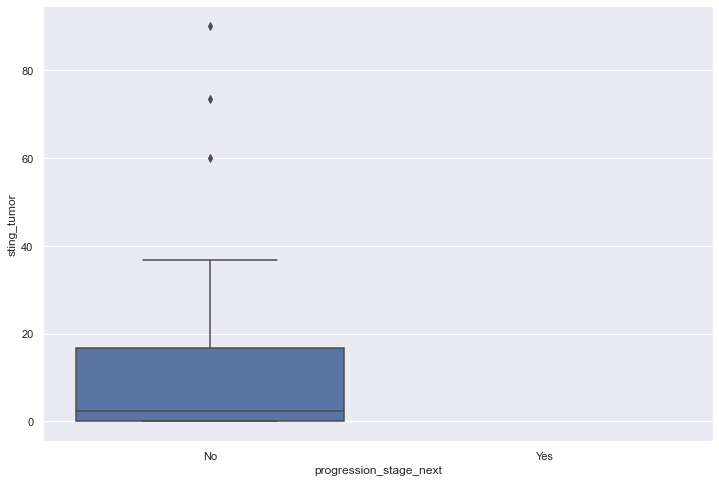

In [40]:
marker = 'sting_tumor'
compare_expression(marker, group, data=df_post)

### STING in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_stage_next,,,,,,,,
No,12.0,98.0,4.0,90.0,96.0,100.0,100.0,100.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

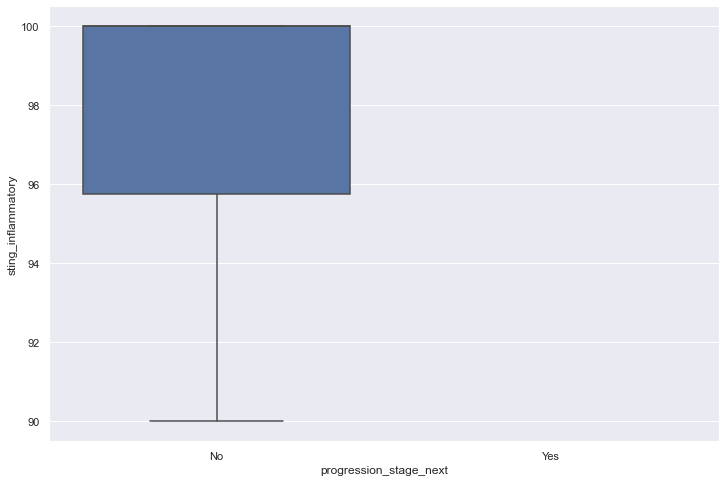

In [41]:
marker = 'sting_inflammatory'
compare_expression(marker, group, data=df_post)

### cGAS in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_stage_next,,,,,,,,
No,16.0,76.0,26.0,13.0,66.0,88.0,93.0,100.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

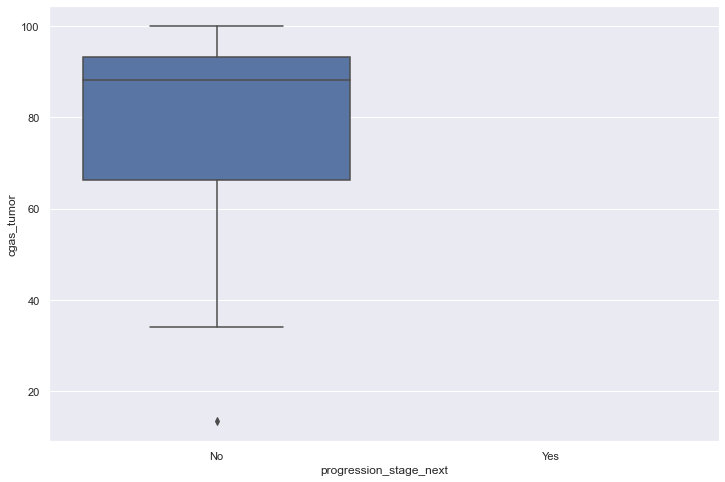

In [42]:
marker = 'cgas_tumor'
compare_expression(marker, group, data=df_post)

### cGAS in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_stage_next,,,,,,,,
No,12.0,7.0,12.0,0.0,0.0,2.0,10.0,34.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

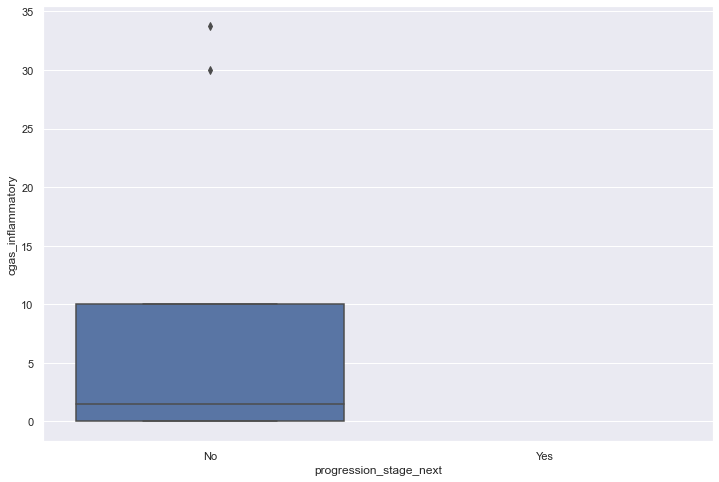

In [43]:
marker = 'cgas_inflammatory'
compare_expression(marker, group, data=df_post)

### pIRF3 in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_stage_next,,,,,,,,
No,16.0,23.0,36.0,0.0,0.0,0.0,30.0,100.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

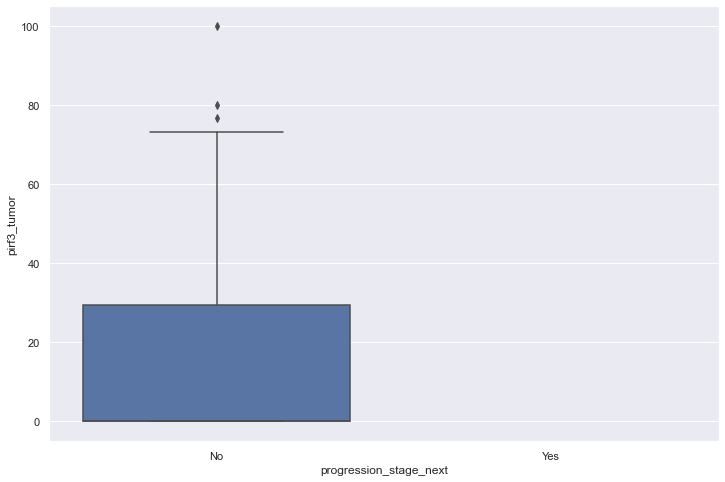

In [44]:
marker = 'pirf3_tumor'
compare_expression(marker, group, data=df_post)

### pIRF3 in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_stage_next,,,,,,,,
No,12.0,3.0,6.0,0.0,0.0,0.0,3.0,16.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

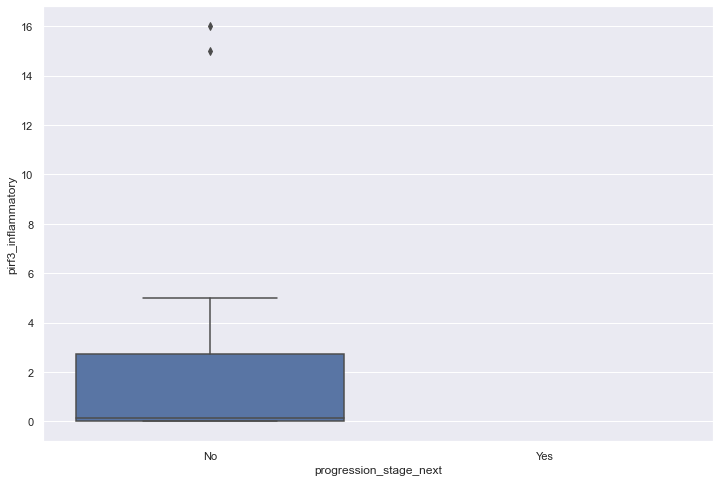

In [45]:
marker = 'pirf3_inflammatory'
compare_expression(marker, group, data=df_post)

## Stage progression at any biopsy

In [46]:
group = 'progression_stage_any'

### STING in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_stage_any,,,,,,,,
No,15.0,19.0,31.0,0.0,0.0,2.0,23.0,90.0
Yes,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0


<IPython.core.display.Math object>

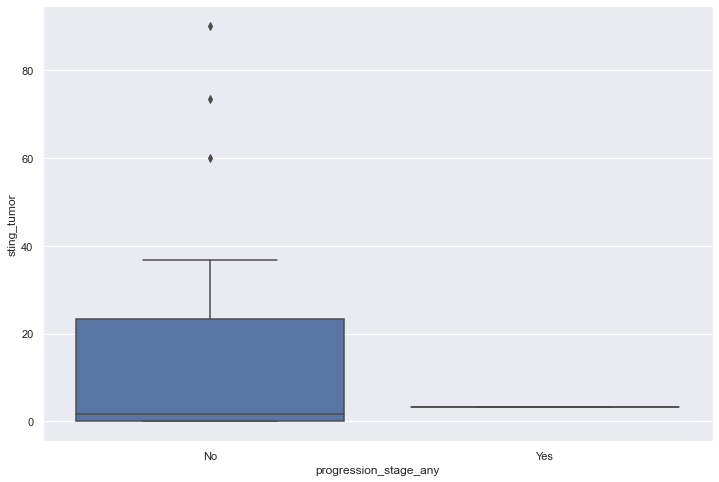

In [47]:
marker = 'sting_tumor'
compare_expression(marker, group, data=df_post)

### STING in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_stage_any,,,,,,,,
No,11.0,97.0,4.0,90.0,96.0,100.0,100.0,100.0
Yes,1.0,100.0,NaN,100.0,100.0,100.0,100.0,100.0


<IPython.core.display.Math object>

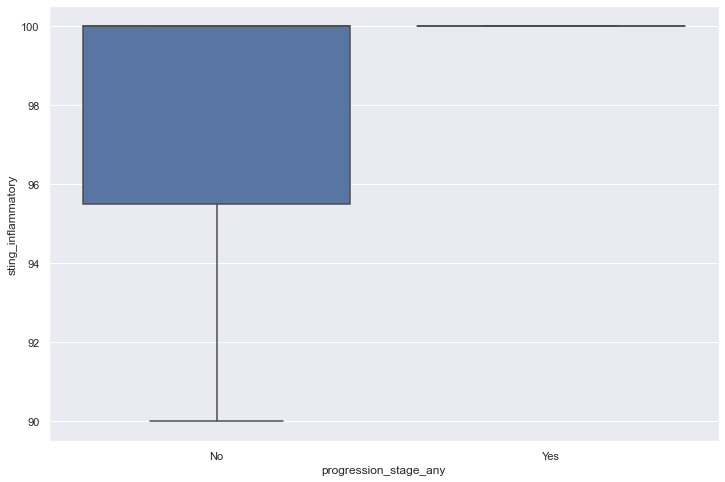

In [48]:
marker = 'sting_inflammatory'
compare_expression(marker, group, data=df_post)

### cGAS in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_stage_any,,,,,,,,
No,15.0,75.0,26.0,13.0,66.0,88.0,92.0,100.0
Yes,1.0,100.0,NaN,100.0,100.0,100.0,100.0,100.0


<IPython.core.display.Math object>

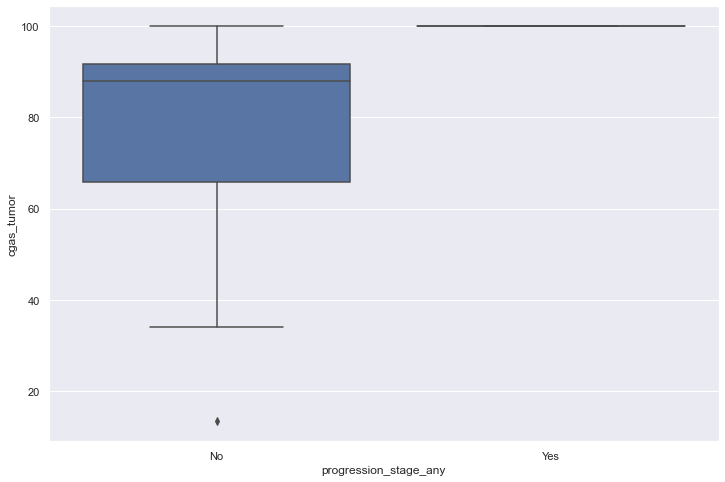

In [49]:
marker = 'cgas_tumor'
compare_expression(marker, group, data=df_post)

### cGAS in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_stage_any,,,,,,,,
No,11.0,7.0,13.0,0.0,0.0,1.0,6.0,34.0
Yes,1.0,10.0,NaN,10.0,10.0,10.0,10.0,10.0


<IPython.core.display.Math object>

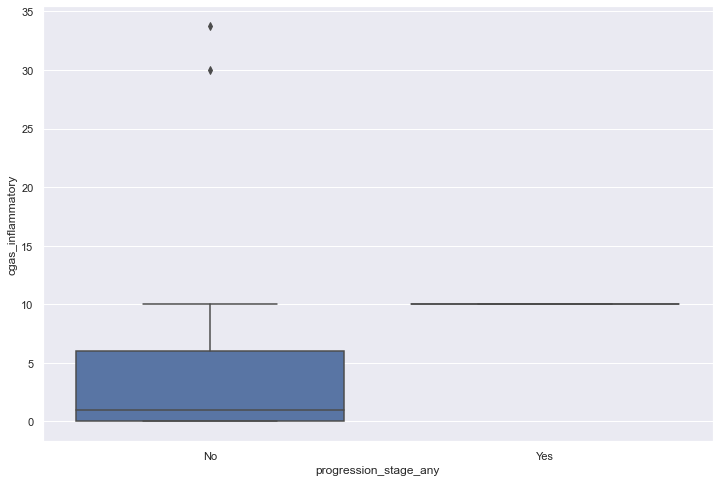

In [50]:
marker = 'cgas_inflammatory'
compare_expression(marker, group, data=df_post)

### pIRF3 in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_stage_any,,,,,,,,
No,15.0,23.0,37.0,0.0,0.0,0.0,44.0,100.0
Yes,1.0,15.0,NaN,15.0,15.0,15.0,15.0,15.0


<IPython.core.display.Math object>

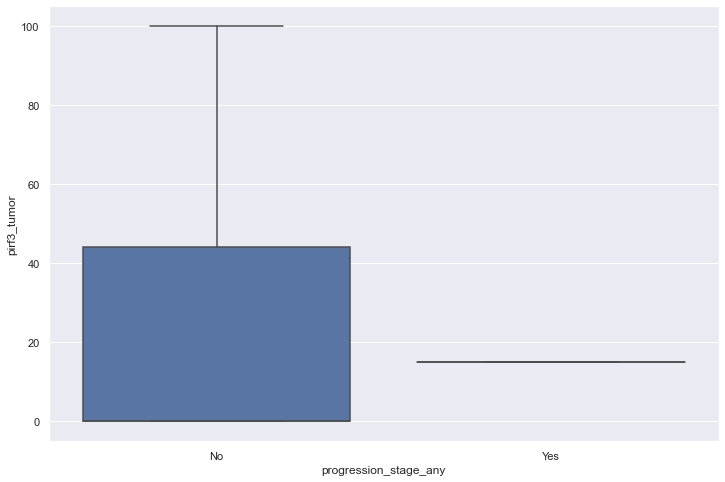

In [51]:
marker = 'pirf3_tumor'
compare_expression(marker, group, data=df_post)

### pIRF3 in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_stage_any,,,,,,,,
No,11.0,3.0,6.0,0.0,0.0,0.0,3.0,16.0
Yes,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0


<IPython.core.display.Math object>

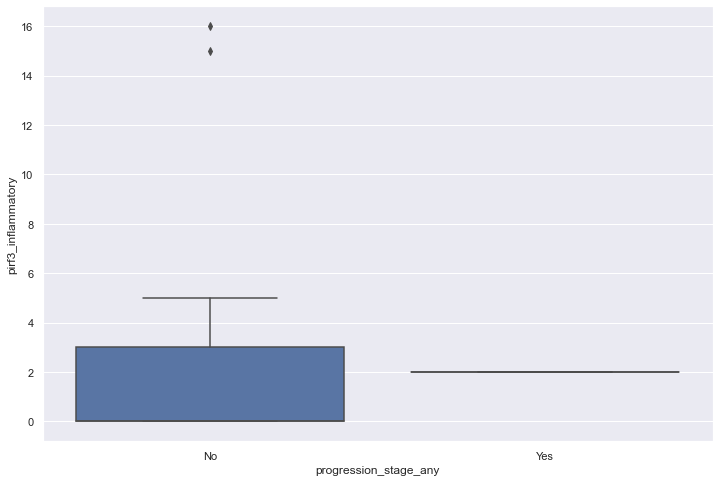

In [52]:
marker = 'pirf3_inflammatory'
compare_expression(marker, group, data=df_post)

# Expression by outcome in post treated patients

In [53]:
# Selecting biopsies that were taken AFTER BCG treatment
df_post = df.query('sp_bcg_timing == "Post"')
df_post.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 05-S-503 to 11-S-4639
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   pt                      26 non-null     object  
 1   lesion                  29 non-null     object  
 2   turb                    29 non-null     int64   
 3   recurrence_next         23 non-null     object  
 4   recurrence_any          29 non-null     object  
 5   progression_grade_next  25 non-null     object  
 6   progression_grade_any   29 non-null     object  
 7   progression_stage_next  22 non-null     object  
 8   progression_stage_any   29 non-null     object  
 9   sp_bcg_timing           29 non-null     category
 10  sting_tumor             14 non-null     float64 
 11  sting_inflammatory      11 non-null     float64 
 12  cgas_tumor              14 non-null     float64 
 13  cgas_inflammatory       11 non-null     float64 
 14  pirf3_tumor        

## Recurrence at next biopsy

In [54]:
group = 'recurrence_next'

### STING in tumor cells

,count,mean,std,min,25%,50%,75%,max
recurrence_next,,,,,,,,
No,6.0,31.0,39.0,0.0,2.0,13.0,65.0,80.0
Yes,6.0,23.0,30.0,0.0,6.0,10.0,28.0,80.0


<IPython.core.display.Math object>

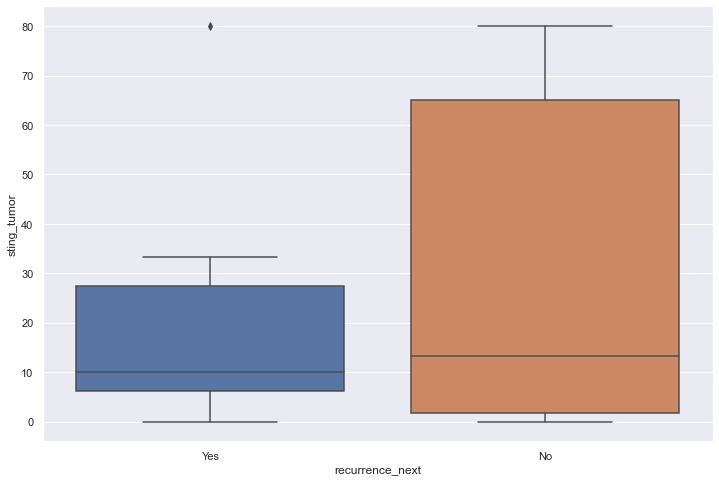

In [55]:
marker = 'sting_tumor'
compare_expression(marker, group, data=df_post)

### STING in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
recurrence_next,,,,,,,,
No,3.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
Yes,6.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0


<IPython.core.display.Math object>

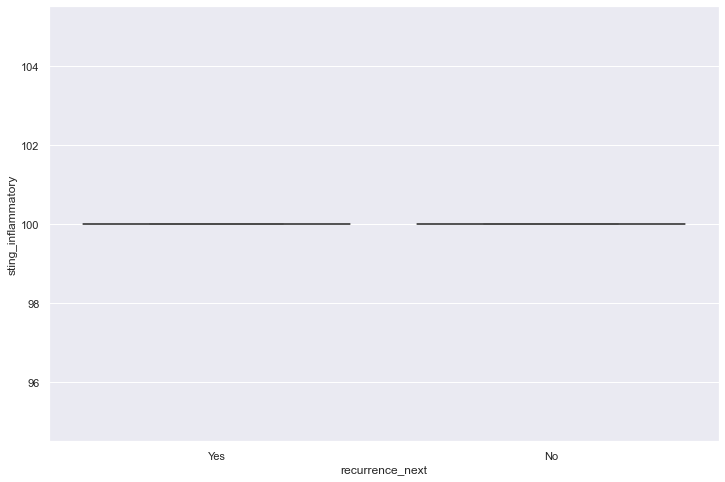

In [56]:
marker = 'sting_inflammatory'
compare_expression(marker, group, data=df_post)

### cGAS in tumor cells

,count,mean,std,min,25%,50%,75%,max
recurrence_next,,,,,,,,
No,6.0,37.0,35.0,0.0,10.0,30.0,68.0,80.0
Yes,6.0,74.0,28.0,30.0,58.0,85.0,95.0,100.0


<IPython.core.display.Math object>

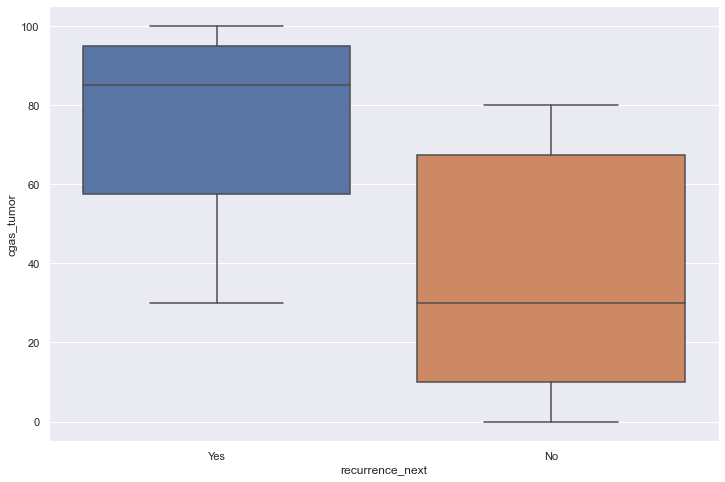

In [57]:
marker = 'cgas_tumor'
compare_expression(marker, group, data=df_post)

### cGAS in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
recurrence_next,,,,,,,,
No,3.0,4.0,5.0,0.0,1.0,2.0,6.0,10.0
Yes,6.0,17.0,15.0,0.0,6.0,15.0,24.0,40.0


<IPython.core.display.Math object>

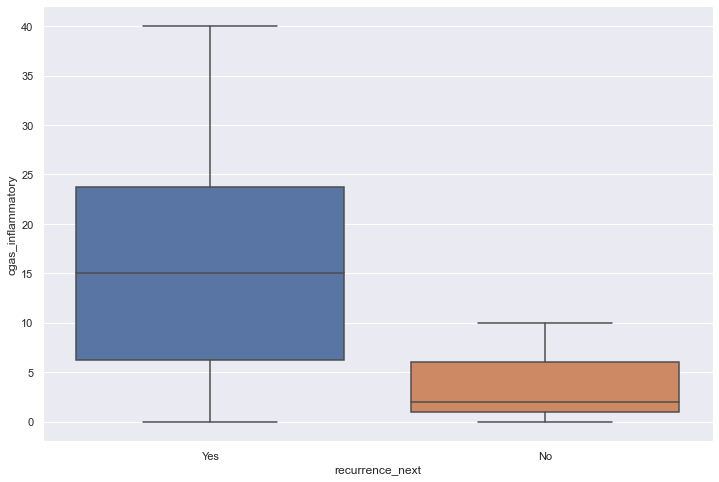

In [58]:
marker = 'cgas_inflammatory'
compare_expression(marker, group, data=df_post)

### pIRF3 in tumor cells

,count,mean,std,min,25%,50%,75%,max
recurrence_next,,,,,,,,
No,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yes,6.0,7.0,16.0,0.0,0.0,0.0,3.0,40.0


<IPython.core.display.Math object>

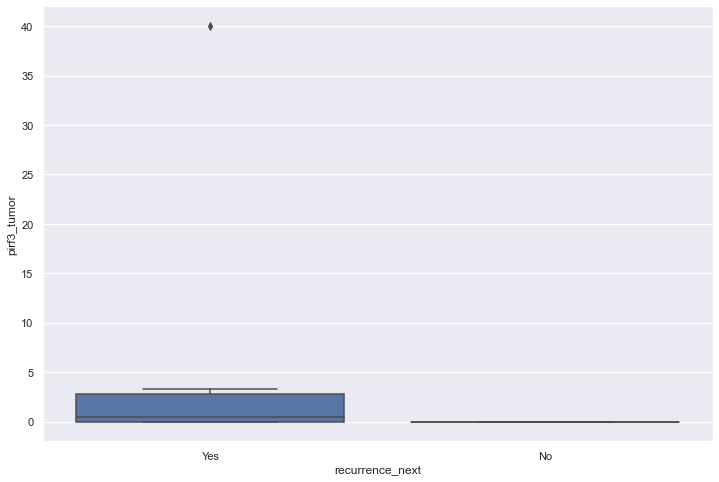

In [59]:
marker = 'pirf3_tumor'
compare_expression(marker, group, data=df_post)

### pIRF3 in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
recurrence_next,,,,,,,,
No,3.0,30.0,52.0,0.0,0.0,0.0,45.0,90.0
Yes,6.0,16.0,20.0,0.0,0.0,10.0,28.0,48.0


<IPython.core.display.Math object>

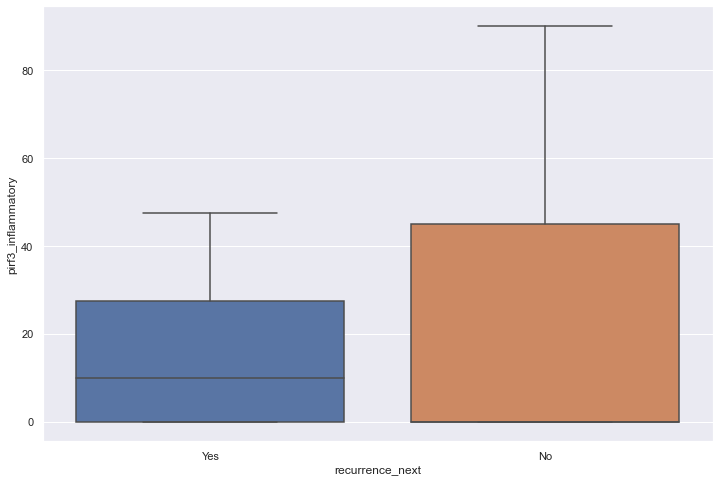

In [60]:
marker = 'pirf3_inflammatory'
compare_expression(marker, group, data=df_post)

## Recurrence at any biopsy

In [61]:
group = 'recurrence_any'
# The analysis was not possible due to the absence of cases that did not show recurrence at any biopsy

### STING in tumor cells

In [62]:
marker = 'sting_tumor'
# compare_expression(marker, group, data=df_post)
df_post.groupby(group)[marker].describe().round()

,count,mean,std,min,25%,50%,75%,max
recurrence_any,,,,,,,,
Yes,14.0,24.0,32.0,0.0,1.0,10.0,30.0,80.0


### STING in peritumoral lymphocytes

In [63]:
marker = 'sting_inflammatory'
# compare_expression(marker, group, data=df_post)
df_post.groupby(group)[marker].describe().round()

,count,mean,std,min,25%,50%,75%,max
recurrence_any,,,,,,,,
Yes,11.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0


### cGAS in tumor cells

In [64]:
marker = 'cgas_tumor'
# compare_expression(marker, group, data=df_post)
df_post.groupby(group)[marker].describe().round()

,count,mean,std,min,25%,50%,75%,max
recurrence_any,,,,,,,,
Yes,14.0,55.0,38.0,0.0,30.0,65.0,88.0,100.0


### cGAS in peritumoral lymphocytes

In [65]:
marker = 'cgas_inflammatory'
# compare_expression(marker, group, data=df_post)
df_post.groupby(group)[marker].describe().round()

,count,mean,std,min,25%,50%,75%,max
recurrence_any,,,,,,,,
Yes,11.0,14.0,14.0,0.0,4.0,10.0,22.0,40.0


### pIRF3 in tumor cells

In [66]:
marker = 'pirf3_tumor'
# compare_expression(marker, group, data=df_post)
df_post.groupby(group)[marker].describe().round()

,count,mean,std,min,25%,50%,75%,max
recurrence_any,,,,,,,,
Yes,14.0,4.0,11.0,0.0,0.0,0.0,1.0,40.0


### pIRF3 in peritumoral lymphocytes

In [67]:
marker = 'pirf3_inflammatory'
# compare_expression(marker, group, data=df_post)
df_post.groupby(group)[marker].describe().round()

,count,mean,std,min,25%,50%,75%,max
recurrence_any,,,,,,,,
Yes,11.0,19.0,29.0,0.0,0.0,0.0,26.0,90.0


## Grade progression at next biopsy

In [68]:
group = 'progression_grade_next'

### STING in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_grade_next,,,,,,,,
No,13.0,25.0,33.0,0.0,0.0,10.0,33.0,80.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

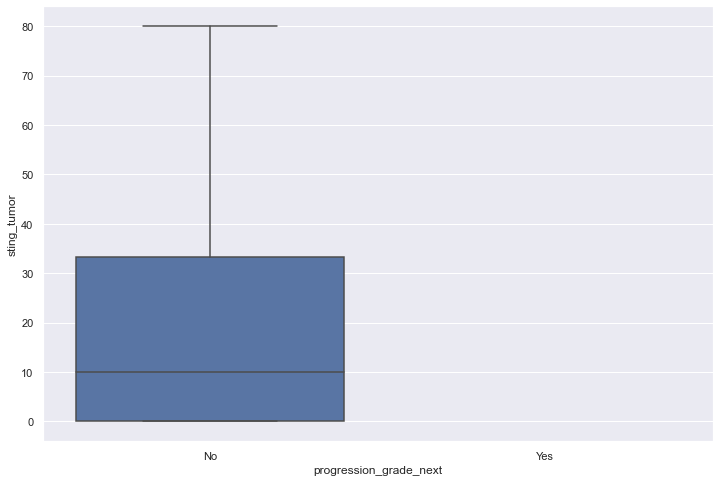

In [69]:
marker = 'sting_tumor'
compare_expression(marker, group, data=df_post)

### STING in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_grade_next,,,,,,,,
No,10.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

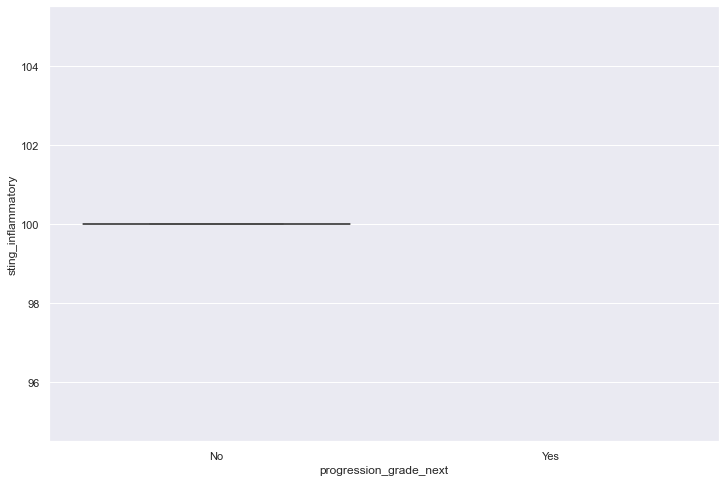

In [70]:
marker = 'sting_inflammatory'
compare_expression(marker, group, data=df_post)

### cGAS in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_grade_next,,,,,,,,
No,13.0,52.0,37.0,0.0,30.0,50.0,80.0,100.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

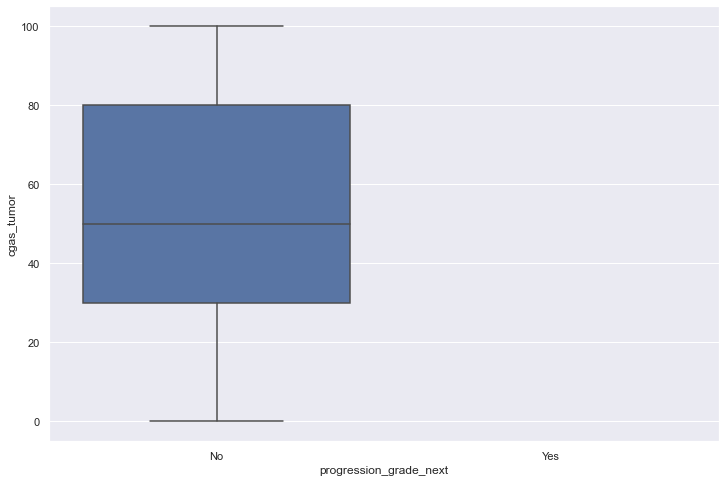

In [71]:
marker = 'cgas_tumor'
compare_expression(marker, group, data=df_post)

### cGAS in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_grade_next,,,,,,,,
No,10.0,15.0,15.0,0.0,3.0,10.0,24.0,40.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

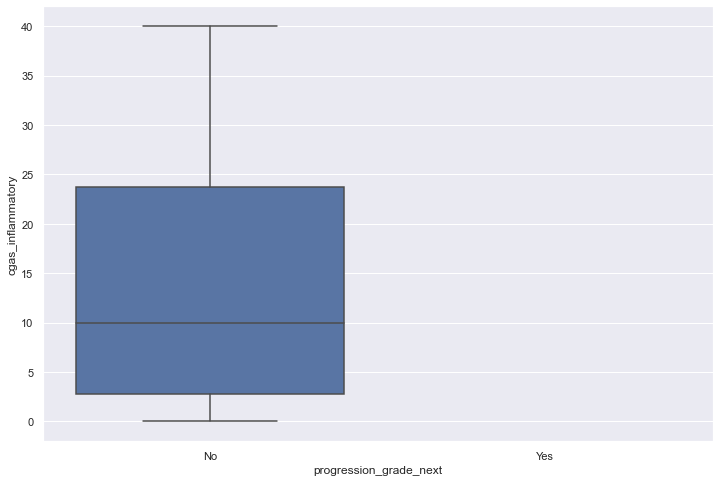

In [72]:
marker = 'cgas_inflammatory'
compare_expression(marker, group, data=df_post)

### pIRF3 in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_grade_next,,,,,,,,
No,13.0,3.0,11.0,0.0,0.0,0.0,0.0,40.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

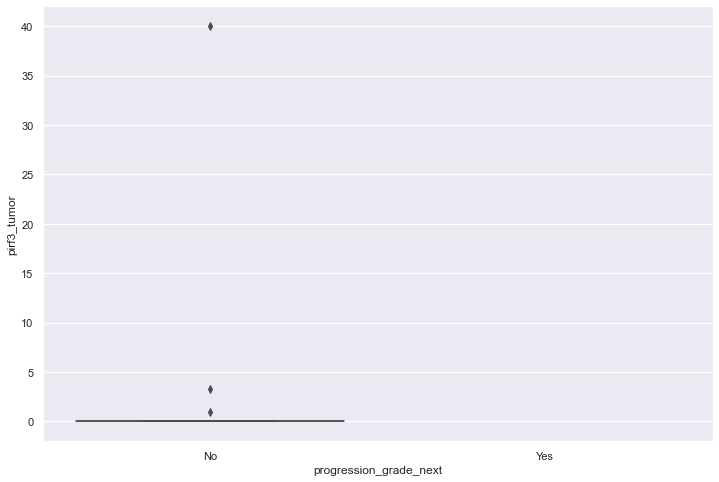

In [73]:
marker = 'pirf3_tumor'
compare_expression(marker, group, data=df_post)

### pIRF3 in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_grade_next,,,,,,,,
No,10.0,21.0,29.0,0.0,0.0,10.0,28.0,90.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

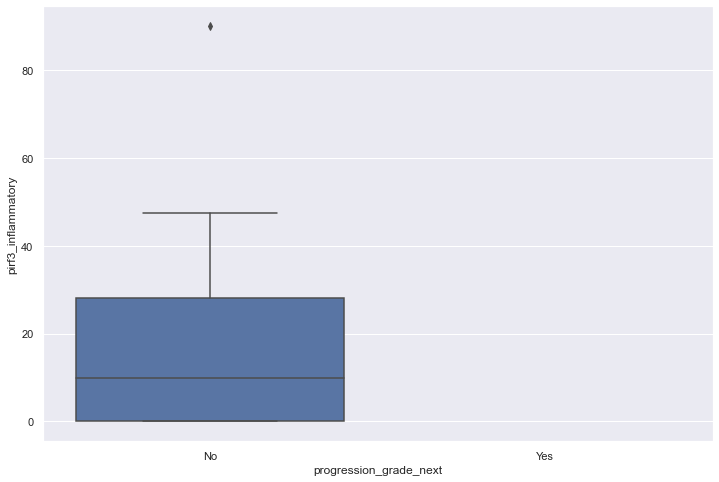

In [74]:
marker = 'pirf3_inflammatory'
compare_expression(marker, group, data=df_post)

## Grade progression at any biopsy

In [75]:
group = 'progression_grade_any'

### STING in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_grade_any,,,,,,,,
No,13.0,26.0,32.0,0.0,5.0,10.0,33.0,80.0
Yes,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Math object>

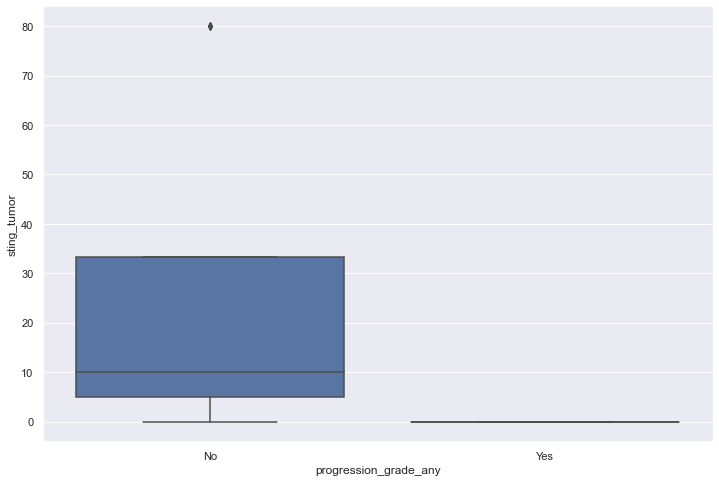

In [76]:
marker = 'sting_tumor'
compare_expression(marker, group, data=df_post)

### STING in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_grade_any,,,,,,,,
No,10.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
Yes,1.0,100.0,NaN,100.0,100.0,100.0,100.0,100.0


<IPython.core.display.Math object>

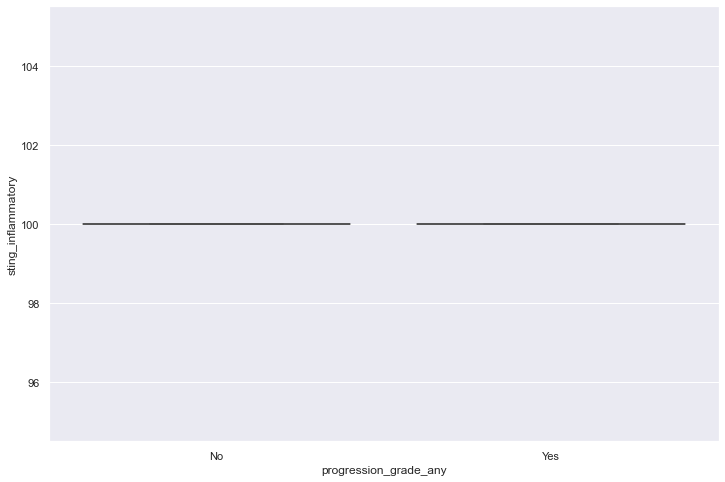

In [77]:
marker = 'sting_inflammatory'
compare_expression(marker, group, data=df_post)

### cGAS in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_grade_any,,,,,,,,
No,13.0,59.0,37.0,0.0,30.0,80.0,90.0,100.0
Yes,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0


<IPython.core.display.Math object>

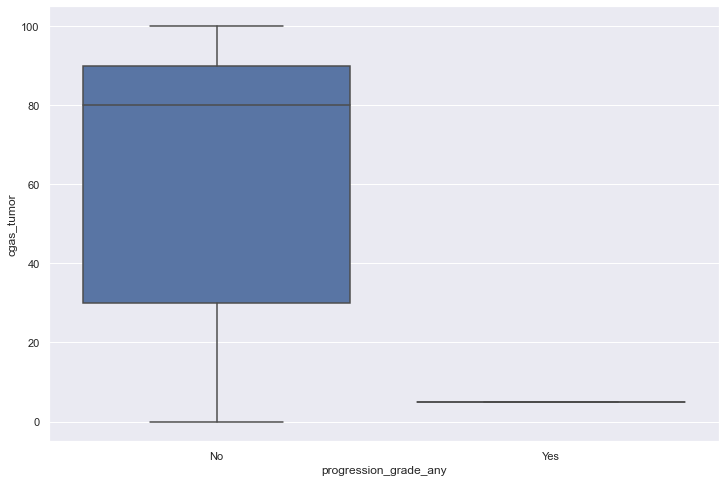

In [78]:
marker = 'cgas_tumor'
compare_expression(marker, group, data=df_post)

### cGAS in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_grade_any,,,,,,,,
No,10.0,12.0,13.0,0.0,3.0,10.0,18.0,40.0
Yes,1.0,35.0,NaN,35.0,35.0,35.0,35.0,35.0


<IPython.core.display.Math object>

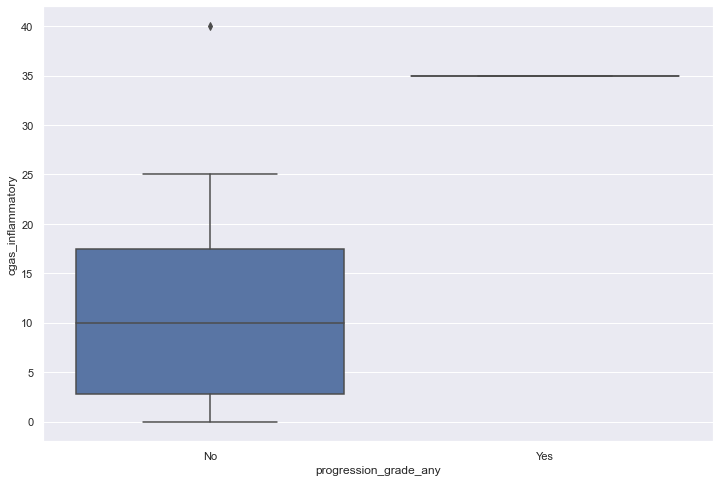

In [79]:
marker = 'cgas_inflammatory'
compare_expression(marker, group, data=df_post)

### pIRF3 in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_grade_any,,,,,,,,
No,13.0,4.0,11.0,0.0,0.0,0.0,1.0,40.0
Yes,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Math object>

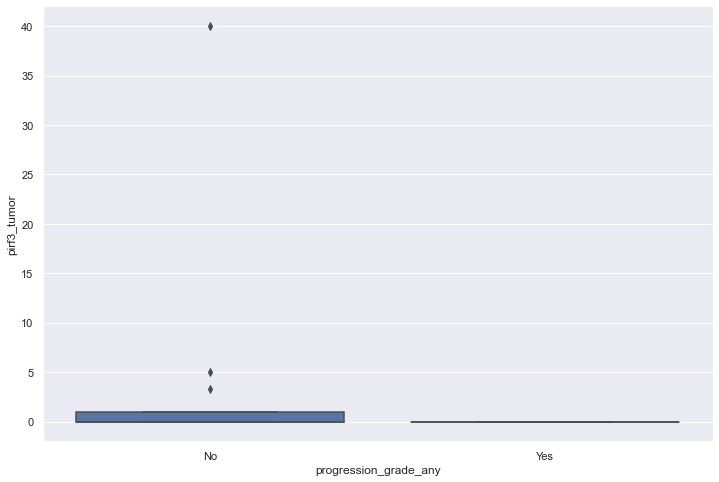

In [80]:
marker = 'pirf3_tumor'
compare_expression(marker, group, data=df_post)

### pIRF3 in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_grade_any,,,,,,,,
No,10.0,19.0,30.0,0.0,0.0,0.0,28.0,90.0
Yes,1.0,22.0,NaN,22.0,22.0,22.0,22.0,22.0


<IPython.core.display.Math object>

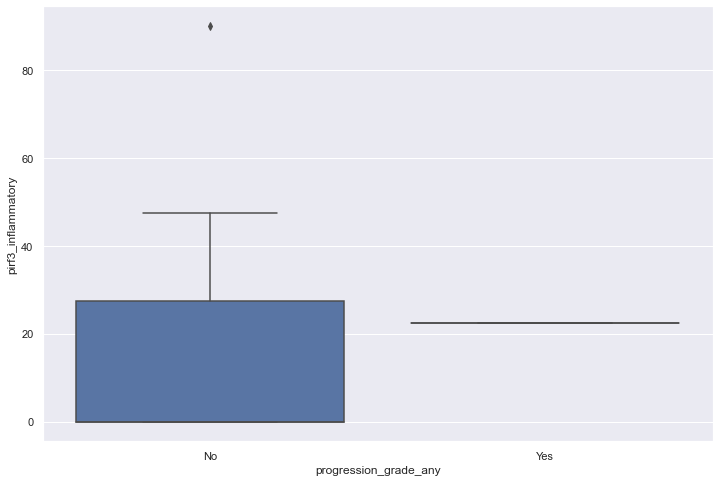

In [81]:
marker = 'pirf3_inflammatory'
compare_expression(marker, group, data=df_post)

## Stage progression at next biopsy

In [82]:
group = 'progression_stage_next'

### STING in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_stage_next,,,,,,,,
No,12.0,27.0,33.0,0.0,4.0,10.0,45.0,80.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

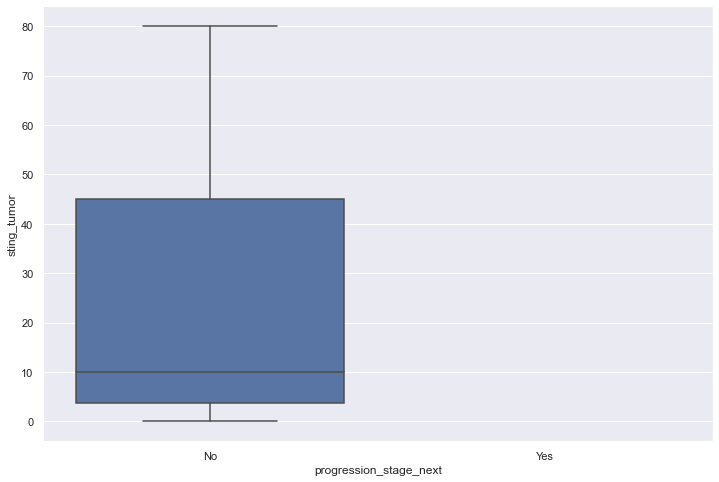

In [83]:
marker = 'sting_tumor'
compare_expression(marker, group, data=df_post)

### STING in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_stage_next,,,,,,,,
No,9.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

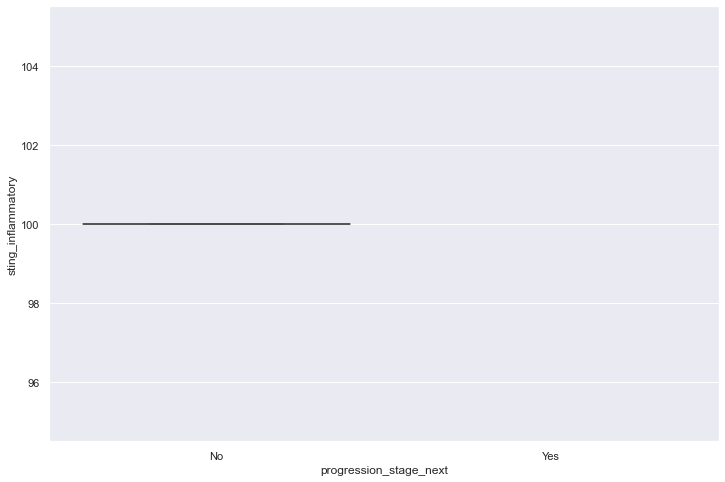

In [84]:
marker = 'sting_inflammatory'
compare_expression(marker, group, data=df_post)

### cGAS in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_stage_next,,,,,,,,
No,12.0,56.0,36.0,0.0,30.0,65.0,82.0,100.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

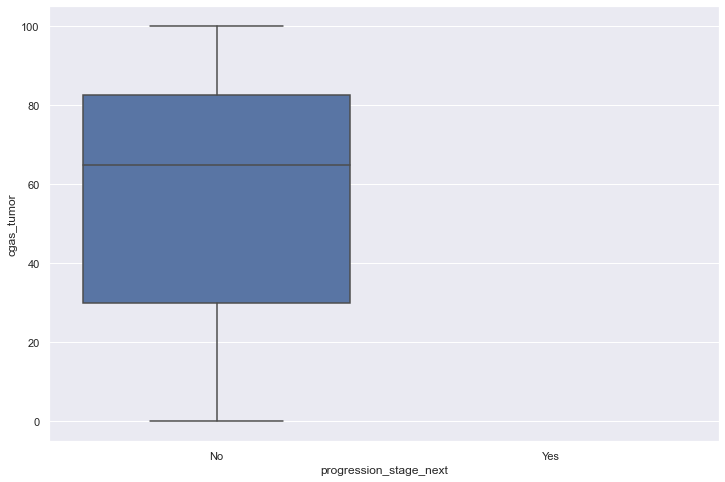

In [85]:
marker = 'cgas_tumor'
compare_expression(marker, group, data=df_post)

### cGAS in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_stage_next,,,,,,,,
No,9.0,12.0,14.0,0.0,2.0,10.0,20.0,40.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

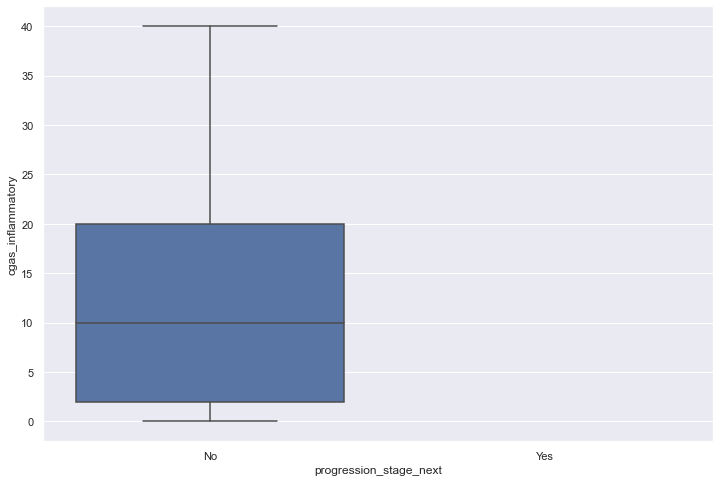

In [86]:
marker = 'cgas_inflammatory'
compare_expression(marker, group, data=df_post)

### pIRF3 in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_stage_next,,,,,,,,
No,12.0,4.0,11.0,0.0,0.0,0.0,0.0,40.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

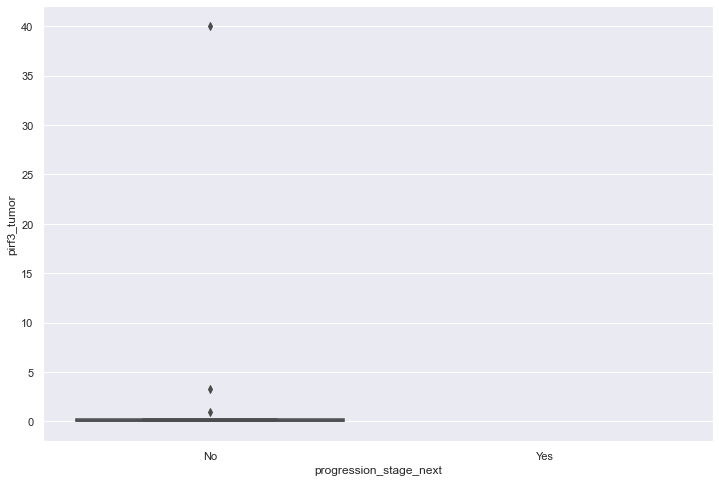

In [87]:
marker = 'pirf3_tumor'
compare_expression(marker, group, data=df_post)

### pIRF3 in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_stage_next,,,,,,,,
No,9.0,21.0,31.0,0.0,0.0,0.0,30.0,90.0
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Math object>

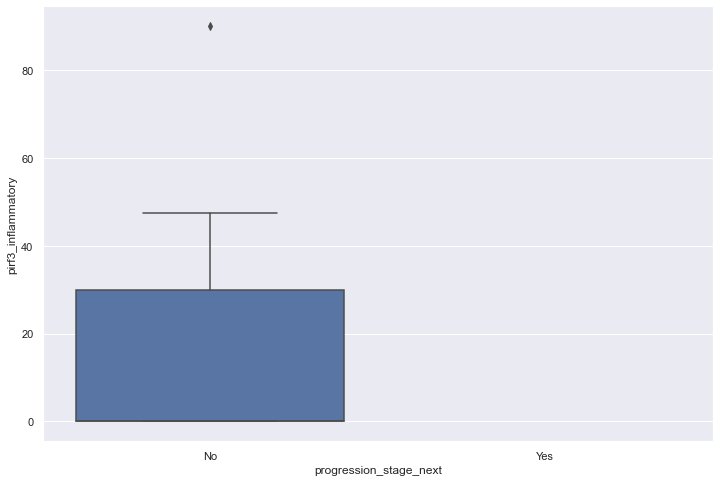

In [88]:
marker = 'pirf3_inflammatory'
compare_expression(marker, group, data=df_post)

## Stage progression at any biopsy

In [89]:
group = 'progression_stage_any'

### STING in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_stage_any,,,,,,,,
No,13.0,26.0,32.0,0.0,5.0,10.0,33.0,80.0
Yes,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Math object>

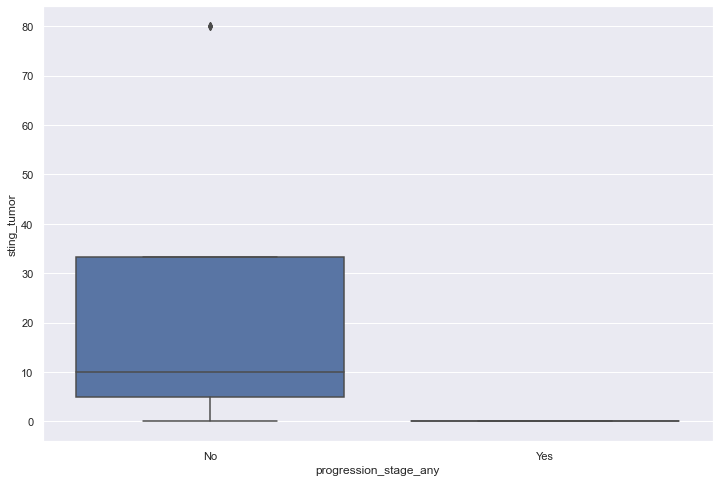

In [90]:
marker = 'sting_tumor'
compare_expression(marker, group, data=df_post)

### STING in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_stage_any,,,,,,,,
No,10.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
Yes,1.0,100.0,NaN,100.0,100.0,100.0,100.0,100.0


<IPython.core.display.Math object>

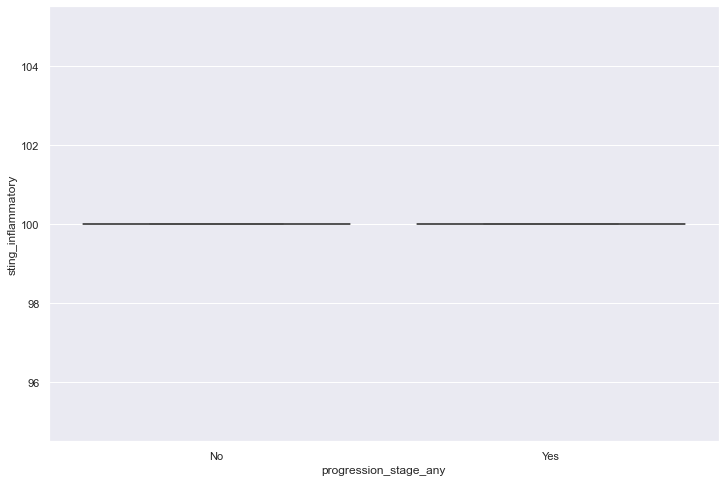

In [91]:
marker = 'sting_inflammatory'
compare_expression(marker, group, data=df_post)

### cGAS in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_stage_any,,,,,,,,
No,13.0,59.0,37.0,0.0,30.0,80.0,90.0,100.0
Yes,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0


<IPython.core.display.Math object>

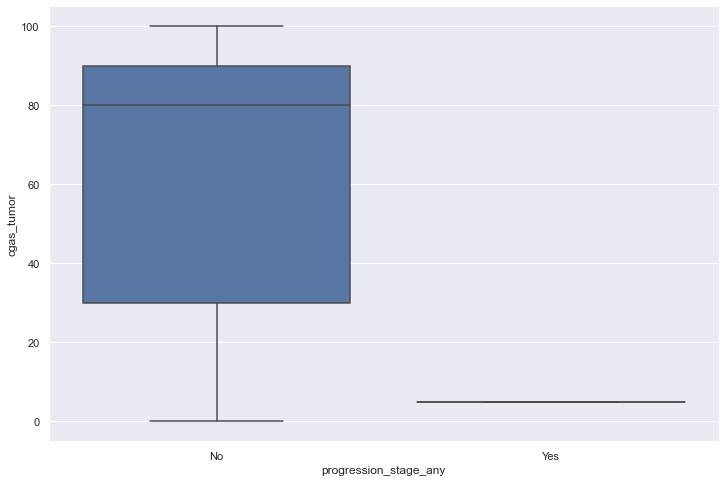

In [92]:
marker = 'cgas_tumor'
compare_expression(marker, group, data=df_post)

### cGAS in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_stage_any,,,,,,,,
No,10.0,12.0,13.0,0.0,3.0,10.0,18.0,40.0
Yes,1.0,35.0,NaN,35.0,35.0,35.0,35.0,35.0


<IPython.core.display.Math object>

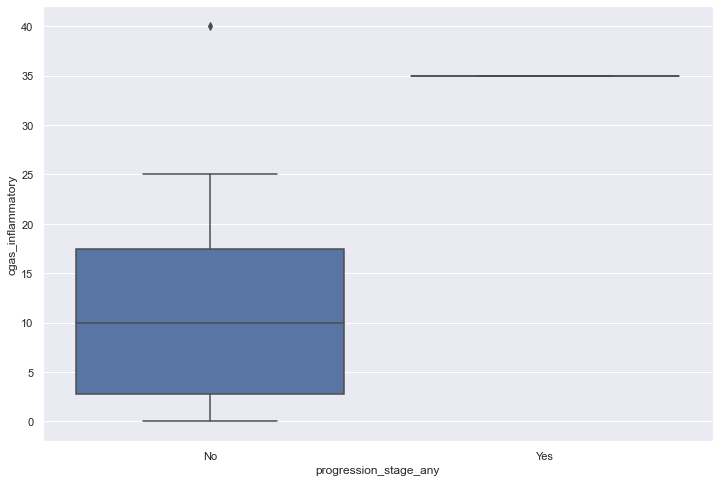

In [93]:
marker = 'cgas_inflammatory'
compare_expression(marker, group, data=df_post)

### pIRF3 in tumor cells

,count,mean,std,min,25%,50%,75%,max
progression_stage_any,,,,,,,,
No,13.0,4.0,11.0,0.0,0.0,0.0,1.0,40.0
Yes,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Math object>

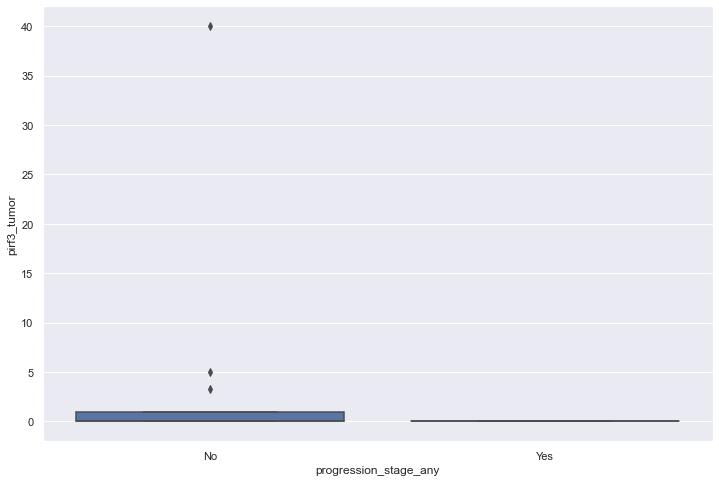

In [94]:
marker = 'pirf3_tumor'
compare_expression(marker, group, data=df_post)

### pIRF3 in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
progression_stage_any,,,,,,,,
No,10.0,19.0,30.0,0.0,0.0,0.0,28.0,90.0
Yes,1.0,22.0,NaN,22.0,22.0,22.0,22.0,22.0


<IPython.core.display.Math object>

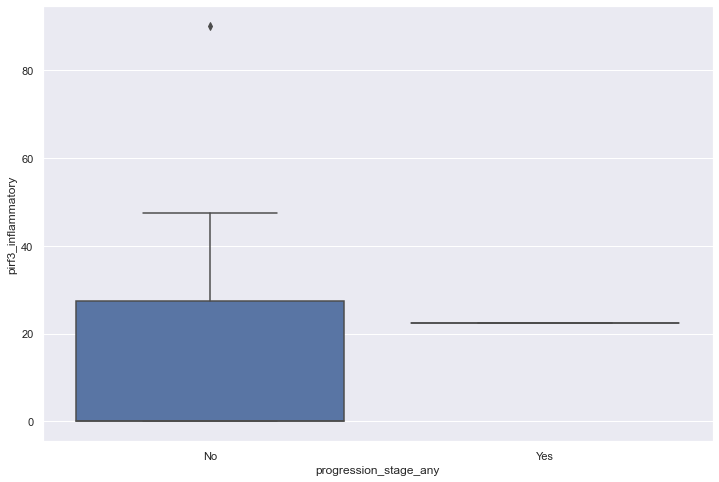

In [95]:
marker = 'pirf3_inflammatory'
compare_expression(marker, group, data=df_post)